In [2]:
import proposal as pp
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions_multi import get_angle_deviation
import os

In [3]:
data_dir = 'data/run_proposal/'
os.system('mkdir -p {}'.format(data_dir))

plot_dir = 'plots/run_proposal/'
os.system('mkdir -p {}'.format(plot_dir))

save_plot = True

In [11]:
E_i = 1e3
E_f = 1e1 
n_events = 1000 
    
deflection = [
    'bremsginneken', # 'bremstsaiapproximation', 
    'ioniznaive',
    'photoginneken', # 'photoborogpetrukhin',
    'epairginneken'] ### same as default
    
e_cut = np.inf # 1e10
v_cut = 1e-3 # 1e-5
cont_rand = True
scattering_method = "moliere" # "highland"
# deflection_type = "m_scat+stochastic"
  
# table_path = "/Users/pascalgutjahr/.cache/PROPOSAL" # macbook pro
table_path = "/net/nfshome/home/pgutjahr/.cache/PROPOSAL" # vollmond
    
rnd_seed = 71530

interpol_nodes = 200

initial_direction = [0, 0, 1]

beta_brems = 1.0
beta_ioniz = 1.0
beta_epair = 1.0
beta_multiplescatter = 1.0
beta_photonuclear = 1.0

max_dist = 1e2 # in cm

In [5]:
pp.InterpolationSettings.tables_path = table_path   # version 7
    
pp.InterpolationSettings.nodes_dndx_e = interpol_nodes
pp.InterpolationSettings.nodes_dndx_v = interpol_nodes

pp.RandomGenerator.get().set_seed(rnd_seed)
args = {
        "particle_def": pp.particle.MuMinusDef(),
        "target": pp.medium.Copper(),
        "interpolate": True,
        "cuts": pp.EnergyCutSettings(e_cut, v_cut, cont_rand)
        }

cross = pp.crosssection.make_std_crosssection(**args)
multiple_scatter = pp.make_multiple_scattering(scattering_method, args["particle_def"], args["target"], cross, True)

stochastic_deflect = []
for d in deflection:
    stochastic_deflect.append(pp.make_stochastic_deflection(d, 
    args["particle_def"], args["target"]))


collection = pp.PropagationUtilityCollection()
collection.displacement = pp.make_displacement(cross, True)
collection.interaction = pp.make_interaction(cross, True)
collection.time = pp.make_time(cross, args["particle_def"], True)
collection.decay = pp.make_decay(cross, args["particle_def"], True)



collection.scattering = pp.scattering.ScatteringMultiplier(
    multiple_scatter, 
    stochastic_deflect, 
    beta_multiplescatter, 
    [(pp.particle.Interaction_Type.brems, beta_brems), (pp.particle.Interaction_Type.ioniz, beta_ioniz), 
    (pp.particle.Interaction_Type.epair, beta_epair), (pp.particle.Interaction_Type.photonuclear, beta_photonuclear)])

utility = pp.PropagationUtility(collection = collection)
detector = pp.geometry.Sphere(pp.Cartesian3D(0,0,0), 1e20) # version 7
density_distr = pp.density_distribution.density_homogeneous(args["target"].mass_density)


prop = pp.Propagator(args["particle_def"], [(detector, utility, density_distr)])

init_state = pp.particle.ParticleState()
init_state.position = pp.Cartesian3D(0, 0, 0) # version 7
init_state.direction = pp.Cartesian3D(initial_direction[0], initial_direction[1], initial_direction[2]) # version 7

[2023-06-20 17:14:18.992] [TableCreation] [warning] Tables are not available and need to be created. They will be written to '/net/nfshome/home/pgutjahr/.cache/PROPOSAL'. This can take some minutes.


# Run simulation

In [12]:
tracks = []
for i in tqdm(range(n_events)):
    init_state.energy = E_i # initial energy in MeV
    track = prop.propagate(init_state, max_distance = max_dist, min_energy = E_f) # max_dist=1e9
    tracks.append(track)

  8%|▊         | 78/1000 [00:00<00:02, 373.81it/s]

[2023-06-20 17:27:58.352] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.55637147065514 MeV.
[2023-06-20 17:27:58.412] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.83651027831924 MeV.
[2023-06-20 17:27:58.442] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.68595246422912 MeV.
[2023-06-20 17:27:58.450] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.55110990261693 MeV.
[2023-06-20 17:27:58.569] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.38633702097796 MeV.
[2023-06-20 17:27:58.581] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.97706573632267 MeV.


 16%|█▌        | 162/1000 [00:00<00:02, 407.60it/s]

[2023-06-20 17:27:58.584] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.56713239655244 MeV.
[2023-06-20 17:27:58.606] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.76319244294474 MeV.
[2023-06-20 17:27:58.650] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.54423118696725 MeV.
[2023-06-20 17:27:58.653] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.42317875127448 MeV.
[2023-06-20 17:27:58.737] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.82511184680604 MeV.
[2023-06-20 17:27:58.754] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.73623109261158 MeV.
[2023-06-20 17:27:58.759] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.74855273845426 MeV.
[2023-06-20 17:27:58.762] [proposal.inter

 24%|██▍       | 243/1000 [00:00<00:01, 394.30it/s]

[2023-06-20 17:27:58.815] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.41355514152364 MeV.
[2023-06-20 17:27:58.856] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.75434895405252 MeV.
[2023-06-20 17:27:58.874] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.173401449095 MeV.
[2023-06-20 17:27:58.932] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.6474754805658 MeV.
[2023-06-20 17:27:58.941] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.2116911186332 MeV.
[2023-06-20 17:27:58.943] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.09894915287228 MeV.
[2023-06-20 17:27:58.978] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.17484978410779 MeV.
[2023-06-20 17:27:58.986] [proposal.interacti

 36%|███▋      | 363/1000 [00:00<00:01, 386.43it/s]

[2023-06-20 17:27:59.059] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.83110291917066 MeV.
[2023-06-20 17:27:59.099] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.90929122323637 MeV.
[2023-06-20 17:27:59.101] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.91978659894662 MeV.
[2023-06-20 17:27:59.106] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.76270090792087 MeV.
[2023-06-20 17:27:59.169] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.60308535765053 MeV.
[2023-06-20 17:27:59.179] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.42992124479174 MeV.
[2023-06-20 17:27:59.190] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.55337216807534 MeV.
[2023-06-20 17:27:59.190] [proposal.inter

 44%|████▍     | 442/1000 [00:01<00:01, 386.35it/s]

[2023-06-20 17:27:59.291] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.37831506173787 MeV.
[2023-06-20 17:27:59.350] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.5033595427548 MeV.
[2023-06-20 17:27:59.367] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.78953769598505 MeV.
[2023-06-20 17:27:59.389] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.75217594715131 MeV.
[2023-06-20 17:27:59.426] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.73497922911208 MeV.
[2023-06-20 17:27:59.452] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.82841703414725 MeV.
[2023-06-20 17:27:59.452] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.78807237043145 MeV.
[2023-06-20 17:27:59.459] [proposal.intera

 56%|█████▌    | 559/1000 [00:01<00:01, 382.84it/s]

[2023-06-20 17:27:59.575] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.18734796180152 MeV.
[2023-06-20 17:27:59.677] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.53498132026955 MeV.
[2023-06-20 17:27:59.680] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.78371337265303 MeV.
[2023-06-20 17:27:59.690] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.090458311508 MeV.
[2023-06-20 17:27:59.712] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.20464613215877 MeV.
[2023-06-20 17:27:59.723] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.75111882842646 MeV.
[2023-06-20 17:27:59.738] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.43765717238986 MeV.
[2023-06-20 17:27:59.748] [proposal.interac

 64%|██████▎   | 636/1000 [00:01<00:00, 376.41it/s]

[2023-06-20 17:27:59.801] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.76170544231013 MeV.
[2023-06-20 17:27:59.801] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.21013603425214 MeV.
[2023-06-20 17:27:59.861] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.4284708062288 MeV.
[2023-06-20 17:27:59.864] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.79231701204384 MeV.
[2023-06-20 17:27:59.882] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.84211430004856 MeV.
[2023-06-20 17:27:59.892] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.64708113448808 MeV.
[2023-06-20 17:27:59.939] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.6218189056956 MeV.
[2023-06-20 17:27:59.967] [proposal.interac

 75%|███████▌  | 750/1000 [00:01<00:00, 376.68it/s]

[2023-06-20 17:28:00.103] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.59718644008123 MeV.
[2023-06-20 17:28:00.163] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.65621229090983 MeV.
[2023-06-20 17:28:00.180] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.50396586517111 MeV.
[2023-06-20 17:28:00.261] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.6890847705337 MeV.
[2023-06-20 17:28:00.266] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.50496913980454 MeV.
[2023-06-20 17:28:00.271] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.17573062928314 MeV.
[2023-06-20 17:28:00.285] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.73431388423536 MeV.
[2023-06-20 17:28:00.306] [proposal.intera

 83%|████████▎ | 828/1000 [00:02<00:00, 381.15it/s]

[2023-06-20 17:28:00.309] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.15823476346995 MeV.
[2023-06-20 17:28:00.376] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.80806629511945 MeV.
[2023-06-20 17:28:00.385] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.20877219465532 MeV.
[2023-06-20 17:28:00.401] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.72434325751915 MeV.
[2023-06-20 17:28:00.412] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.0526748021913 MeV.
[2023-06-20 17:28:00.419] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.34087101978673 MeV.
[2023-06-20 17:28:00.448] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.06930761578752 MeV.
[2023-06-20 17:28:00.462] [proposal.intera

 90%|█████████ | 905/1000 [00:02<00:00, 377.96it/s]

[2023-06-20 17:28:00.571] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.86226685827461 MeV.
[2023-06-20 17:28:00.596] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.61932362258008 MeV.
[2023-06-20 17:28:00.724] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.78290413589527 MeV.


100%|██████████| 1000/1000 [00:02<00:00, 381.80it/s]

[2023-06-20 17:28:00.818] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.46315175458739 MeV.
[2023-06-20 17:28:00.825] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.778654492333 MeV.
[2023-06-20 17:28:00.834] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.7681805060577 MeV.
[2023-06-20 17:28:00.848] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.96915544300424 MeV.
[2023-06-20 17:28:00.868] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.53836761256639 MeV.
[2023-06-20 17:28:00.884] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 111.8659605614594 MeV.
[2023-06-20 17:28:00.934] [proposal.interaction] [warning] No stochastic interaction possible for initial energy 112.8219279516572 MeV.


In [13]:
tracks_zenith = []
tracks_azimuth = []
tracks_x = []
tracks_y = []
tracks_z = []
tracks_pos_x = []
tracks_pos_y = []
tracks_pos_z = []
for track in tqdm(tracks):
    tracks_zenith.append(track.track_directions()[-1].spherical_coordinates[2])
    tracks_azimuth.append(track.track_directions()[-1].spherical_coordinates[1])
    tracks_x.append(track.track_directions()[-1].x)
    tracks_y.append(track.track_directions()[-1].y)
    tracks_z.append(track.track_directions()[-1].z)
    tracks_pos_x.append(track.track_positions()[-1].x)
    tracks_pos_y.append(track.track_positions()[-1].y)
    tracks_pos_z.append(track.track_positions()[-1].z)

100%|██████████| 1000/1000 [00:01<00:00, 519.85it/s]


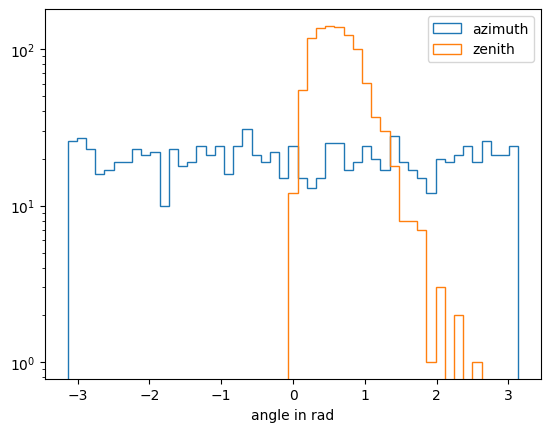

In [14]:
bins = np.linspace(-np.pi, np.pi, 50)
plt.hist(tracks_azimuth, bins=bins, histtype='step', label='azimuth')
plt.hist(tracks_zenith, bins=bins, histtype='step', label='zenith')
plt.xlabel('angle in rad')
plt.yscale('log')
plt.legend()

6.0

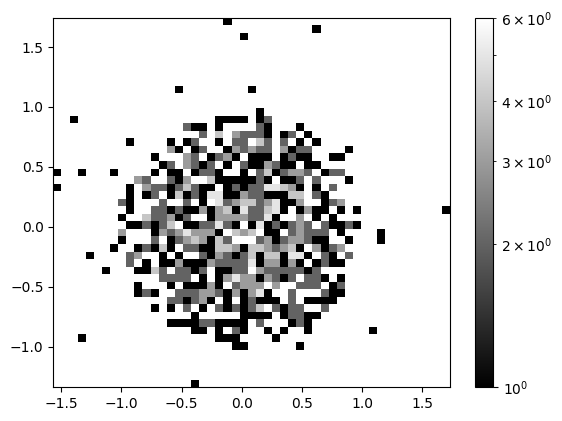

In [15]:
bins = (np.linspace(min(tracks_x), max(tracks_x), 50), np.linspace(min(tracks_y), max(tracks_y), 50))
n = plt.hist2d(tracks_x, tracks_y, bins=bins, norm=mpl.colors.LogNorm(), cmap=mpl.cm.gray)
plt.colorbar()
np.max(n[0])

## save data

In [16]:
# '''
df = pd.DataFrame()
df['tracks_x'] = tracks_x
df['tracks_y'] = tracks_y
df['tracks_z'] = tracks_z
df['tracks_pos_x'] = tracks_pos_x
df['tracks_pos_y'] = tracks_pos_y
df['tracks_pos_z'] = tracks_pos_z
df['tracks_zenith'] = tracks_zenith
df['tracks_azimuth'] = tracks_azimuth
key = 'E{}_{}_v_cut{}'.format(int(E_i), scattering_method, v_cut)
df.to_hdf(data_dir + 'test.hdf5', key=key)
print(key)
# '''

E1000_moliere_v_cut0.001


/scratch/pgutjahr/virtualenvs/proposal_v762/lib64/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'E1000_moliere_v_cut0.001'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


## read data

In [17]:
key_0 = 'E1000_moliere_v_cut0.001'
df_0 = pd.read_hdf(data_dir + 'test.hdf5', key=key_0)
df_0

,tracks_x,tracks_y,tracks_z,tracks_pos_x,tracks_pos_y,tracks_pos_z,tracks_zenith,tracks_azimuth
0,-0.420462,0.280452,0.862878,-6.560786,-0.437505,64.774407,0.529860,2.553352
1,-0.084820,-0.074196,0.993630,-6.395921,2.921765,66.727230,0.112932,-2.422905
2,-0.029264,-0.856502,0.515314,-7.156137,-5.105387,64.134472,1.029422,-1.604950
3,0.609816,0.505438,0.610457,-0.218937,4.063705,64.653165,0.914159,0.692079
4,0.537708,-0.597145,0.595221,-1.398467,-8.770463,61.523139,0.933255,-0.837724
...,...,...,...,...,...,...,...,...
995,-0.318902,-0.240623,0.916735,-0.008013,8.037907,65.907033,0.410968,-2.495196
996,0.462489,-0.301492,0.833791,-2.491889,-2.950777,67.611443,0.584858,-0.577703
997,0.087567,-0.658126,0.747798,1.762293,-2.355228,61.782514,0.726056,-1.438519
998,0.566290,-0.092223,0.819031,2.880409,3.353045,62.620465,0.611077,-0.161438


# Plot all 